In [1]:
%run pylib/unid_analysis dr3 dark #unid-doc dark
self = UnidAnalysis(nc=3)

# Unid analysis with dr3

read summary file `files/dr3_3_class_classification.csv` 
Loaded Fermi 4FGL gll_psc_dr3.fit: 6659 entries


In [2]:
self.df.groupby('source_type').size()

source_type
agn-bll           9
agn-fsrq          2
bcu-bll        1056
bcu-fsrq        402
bcu-pulsar       96
bin-bll           3
bin-pulsar        6
bll-bll        1253
bll-fsrq        100
bll-pulsar        3
css-bll           2
css-fsrq          3
fsrq-bll        146
fsrq-fsrq       618
fsrq-pulsar       7
gal-bll           3
gal-pulsar        1
glc-bll           7
glc-fsrq          3
glc-pulsar       24
hmb-bll           3
hmb-fsrq          4
hmb-pulsar        4
lmb-fsrq          2
lmb-pulsar        4
msp             147
nlsy1-fsrq        8
nov-fsrq          1
nov-pulsar        2
psr             143
pwn-bll           1
pwn-fsrq          1
pwn-pulsar        3
rdg-bll          29
rdg-fsrq         10
rdg-pulsar        2
sbg-bll           6
sbg-fsrq          2
sey-bll           1
sey-fsrq          1
sfr-bll           1
sfr-fsrq          1
snr-bll           4
snr-fsrq          1
snr-pulsar       10
spp-bll          23
spp-fsrq         12
spp-pulsar       66
ssrq-fsrq         2
unid-bll

In [13]:
t = self.df.query('d<0.2 &Fp>10')
t[t.source_type.apply(lambda s: s.startswith('unid'))].sort_values('Fp',ascending=False)

,source_type,glat,glon,significance,r95,Ep,Fp,d,diffuse,p_pulsar,d_unc,log_epeak,log_fpeak,log_signif
4FGL-DR3,,,,,,,,,,,,,,
4FGL J1626.0-4917,unid-fsrq,-0.086,334.625,7.566,0.079,0.100,96.329,0.087,1.942,0.375,0.092157,-1.000000,1.983757,0.878866
4FGL J1514.1-5805,unid-pulsar,-0.283,320.892,5.580,0.082,0.100,91.669,-0.004,1.698,0.560,0.094603,-1.000000,1.962222,0.746634
4FGL J1801.8-2358,unid-pulsar,-0.611,6.107,12.342,0.049,0.100,86.538,0.027,1.816,0.580,0.061425,-1.000000,1.937207,1.091386
4FGL J1829.4-1500,unid-fsrq,-2.058,17.101,4.500,0.077,0.100,78.102,-0.100,1.067,0.145,0.075811,-1.000000,1.892662,0.653213
4FGL J0616.5+2235,unid-bll,2.905,188.962,13.885,0.020,10.197,37.477,0.109,0.905,0.028,0.050494,1.008472,1.573765,1.142546
4FGL J1456.7-6050,unid-bll,-1.590,317.614,5.026,0.043,1000.000,34.409,-0.100,1.164,0.034,0.075704,3.000000,1.536672,0.701222
4FGL J1244.3-6233,unid-pulsar,0.306,302.112,14.081,0.047,0.100,32.078,0.180,1.479,0.682,0.086320,-1.000000,1.506207,1.148633
4FGL J1925.4+1616,unid-pulsar,0.086,51.241,13.525,0.052,0.113,31.554,0.112,1.543,0.756,0.078362,-0.946922,1.499054,1.131137
4FGL J0533.2+3024,unid-pulsar,-1.491,177.314,6.730,0.101,0.100,29.073,0.035,0.849,0.583,0.131211,-1.000000,1.463490,0.828015


<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fe4fd655ed0>
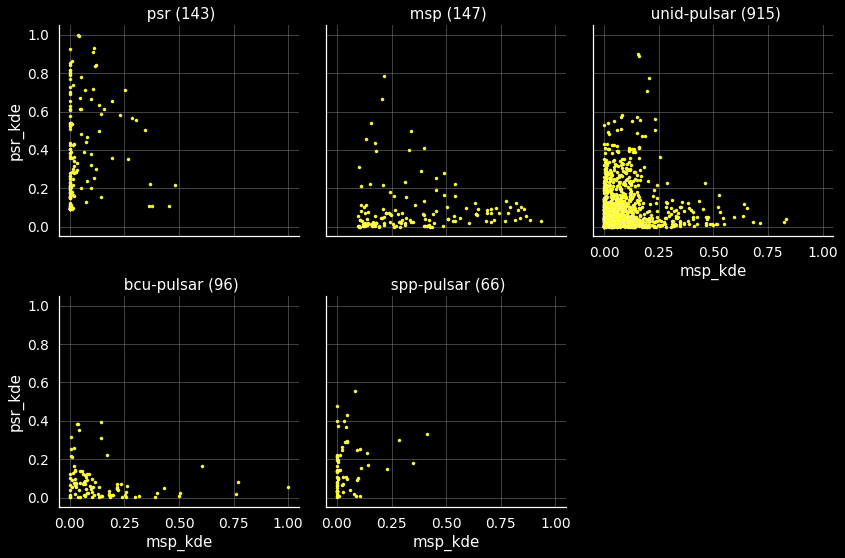

In [3]:
self.pulsar_kde()#  vars=vars, pulsars=pulsars[:2], )
pulsars = list(self.psr_names)[:2]
show_fig( self.plot_kde, order=pulsars + [x+'-pulsar' for x in 'unid bcu spp'.split()],
             fignum=99)

In [4]:
outfile = f'files/unid-mystery-{dataset}.csv'
self.mystery_df.to_csv(outfile, float_format='%.3f')
show(f"""* Wrote {len(self.mystery_df)} mystery sources to `{outfile}`""")

AttributeError: 'UnidAnalysis' object has no attribute 'mystery_df'

In [ ]:
selection='source_type=="unid-pulsar" & msp_kde>0.4 & significance>10'
show(f"""---
## Chose top MSP candidates for Einstein at home
{selection=}""")

t=self.df.query(selection)
msp_for_colin= t['glon glat significance r95 Ep Fp d'.split()].copy()
msp_file = 'files/msp_for_colin.csv'

show(f"""### Retrieve uw1410 positions...
... And check for DR4 association""")

from wtlike.interface import *
if dark_mode: plt.style.use('dark_background') 

dfi = get_fermi_info(msp_for_colin.index)
keep = dfi.dr_class1.values ==''
msp_for_colin['uw_ra'] = dfi.uw_pos.apply(lambda p: p.ra.deg) 
msp_for_colin['uw_dec'] = dfi.uw_pos.apply(lambda p: p.dec.deg) 
msp_for_colin['uw_r95'] = dfi.uw_r95
msp_for_colin.sort_values('significance', ascending=False)

In [ ]:
msp_for_colin.loc[keep].to_csv(msp_file, float_format='%.3f')
show(f"""* Wrote {sum(keep)} to `{msp_file}`""")

In [ ]:
df = self.mystery_df.query('0.3<Ep<1.1').copy()
df['d_rel'] = (df.d_unc/df.d).clip(0,1)
sns.pairplot(df, vars='log_fpeak log_epeak d d_unc d_rel'.split(), height=3, 
             plot_kws=dict(s=10), diag_kws=dict(bins=26,element='step'));